lifestyle data analysis


In [9]:
import pandas as pd
import numpy as np

In [10]:
#load data sets
def load_data(file_path):
    """Load data from a CSV file into a pandas DataFrame."""
    try:
        df = pd.read_csv(file_path, encoding ='utf-8')
        print(df.head(5))
        return df
    
    except FileNotFoundError:
        print("The specified file was not found.")
        return None

def clean_data(df):
 """clean the dataframe by handling missung values and duplicates."""
 if df is not None:
     df = df.drop_duplicates()
     df = df.dropna()
     return df
 return None

In [11]:
file_path= r"D:\datascience\DS-project-1\Final_data.csv"
data = load_data(file_path)
cleaned_data = clean_data(data)

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4                      1.08          1166.40     Strength  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0          2139.59   0.500432        1.624789  0.741237   0.835985   
1     

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

In [13]:
#identifying categorical columns
categorical_cols = cleaned_data.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Gender', 'Workout_Type', 'meal_name', 'meal_type', 'diet_type',
       'cooking_method', 'Name of Exercise', 'Benefit', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'Burns_Calories_Bin'],
      dtype='object')


In [14]:
#encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    cleaned_data[col] = le.fit_transform(cleaned_data[col])

print(cleaned_data.head())



     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91       1        65.27        1.62   188.58   157.65        69.05   
1  23.37       0        56.41        1.55   179.43   131.75        73.18   
2  33.20       0        58.98        1.67   175.04   123.95        54.96   
3  38.69       0        93.78        1.70   191.21   155.10        50.07   
4  45.09       1        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned  Workout_Type  ...  \
0                      1.00          1080.90             2  ...   
1                      1.37          1809.91             1  ...   
2                      0.91           802.26             0  ...   
3                      1.10          1450.79             1  ...   
4                      1.08          1166.40             2  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0          2139.59   0.500432        1.624789  0.741237   0.835985   


In [15]:
# Convert floats to float32
float_cols = cleaned_data.select_dtypes(include=['float64']).columns
cleaned_data[float_cols] = cleaned_data[float_cols].astype('float32')

#convert integers to int32
int_cols = cleaned_data.select_dtypes(include=['int64']).columns
cleaned_data[int_cols] = cleaned_data[int_cols].astype('int32')

In [16]:
data.columns


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

DATA VISUALIZATION

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



In [19]:
number_male_female = cleaned_data['Gender'].value_counts()
number_male_female


Gender
0    10028
1     9972
Name: count, dtype: int64

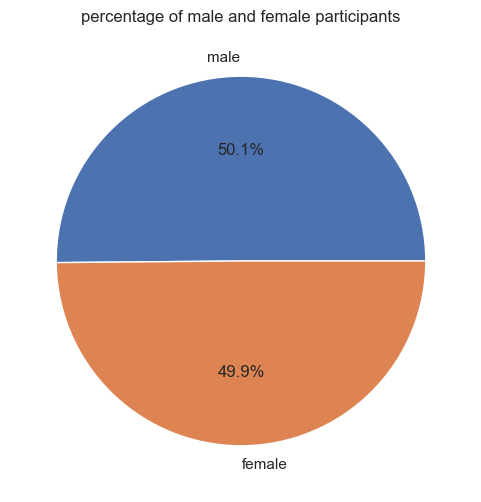

In [20]:
plt.figure(figsize=(6,6))
labels=['male','female']
plt.pie(x=number_male_female.values,labels=labels,autopct='%1.1f%%')
plt.title('percentage of male and female participants')
plt.show()

In [21]:
workout_types=cleaned_data.groupby(['Workout_Type','Gender']).agg(
    average_burned_calories=('Calories_Burned','mean'),
    gender_count=('Gender','value_counts')
)
workout_types

average_burned_calories  gender_count
Workout_Type Gender                                       
0            0                   1215.020752          2418
             1                   1208.189331          2505
1            0                   1645.911377          2479
             1                   1659.112671          2495
2            0                   1362.775024          2601
             1                   1360.014526          2470
3            0                    896.823547          2530
             1                    897.394104          2502

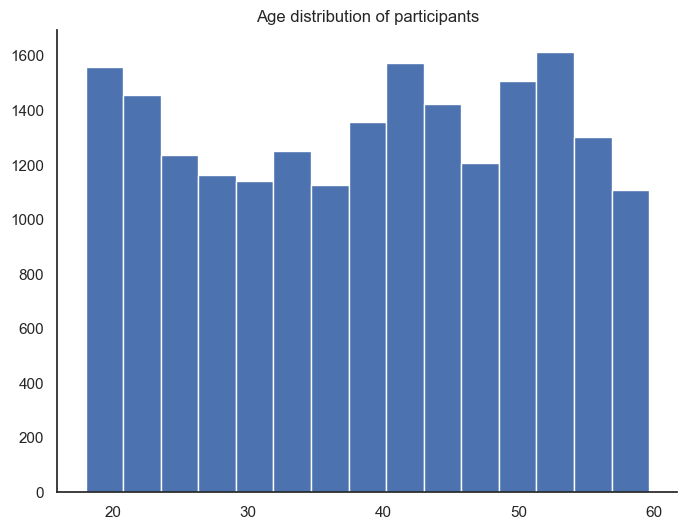

In [22]:
plt.figure(figsize=(8,6))
sns.set_style('white')
plt.hist(x= cleaned_data['Age'],bins=15)
plt.title('Age distribution of participants')
sns.despine()
plt.show()

In [23]:
# Check for infinite values
print("Columns with infinite values:")
print(cleaned_data.columns[np.isinf(cleaned_data).any()])
print("\nColumns with abnormally large values (> 1e10):")
for col in cleaned_data.select_dtypes(include=['number']).columns:
    if (cleaned_data[col].abs() > 1e10).any():
        print(col)

Columns with infinite values:
Index([], dtype='object')

Columns with abnormally large values (> 1e10):
Burns Calories (per 30 min)_bc


In [24]:
# Replace inf and -inf with NaN
cleaned_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [25]:
# Basic summaries
print("Shape:", cleaned_data.shape)
print(cleaned_data.describe(include='all').round(2).T)

# Value counts for categorical-ish columns
for col in cleaned_data.select_dtypes(include=['object','category']).columns:
    print("\nValue counts for:", col)
    print(cleaned_data[col].value_counts(dropna=False).head(20))

# Numeric missing & skew
num_cols = cleaned_data.select_dtypes(include=['int32','float32','int64','float64']).columns.tolist()
missing = cleaned_data[num_cols].isnull().sum()
skewness = cleaned_data[num_cols].skew().sort_values(ascending=False)
print("\nMissing numeric:\n", missing)
print("\nSkewness numeric (top):\n", skewness.head(10))

Shape: (20000, 54)
                                  count          mean     std           min  \
Age                             20000.0  3.885000e+01   12.11  1.800000e+01   
Gender                          20000.0  5.000000e-01    0.50  0.000000e+00   
Weight (kg)                     20000.0  7.390000e+01   21.17  3.918000e+01   
Height (m)                      20000.0  1.720000e+00    0.13  1.490000e+00   
Max_BPM                         20000.0  1.798900e+02   11.51  1.593100e+02   
Avg_BPM                         20000.0  1.437000e+02   14.27  1.190700e+02   
Resting_BPM                     20000.0  6.220000e+01    7.29  4.949000e+01   
Session_Duration (hours)        20000.0  1.260000e+00    0.34  4.900000e-01   
Calories_Burned                 20000.0  1.280110e+03  502.23  3.231100e+02   
Workout_Type                    20000.0  1.510000e+00    1.12  0.000000e+00   
Fat_Percentage                  20000.0  2.610000e+01    5.00  1.133000e+01   
Water_Intake (liters)           2

c:\python\Lib\site-packages\pandas\core\nanops.py:1025: RuntimeWarning: overflow encountered in cast
  result = result.astype(dtype, copy=False)


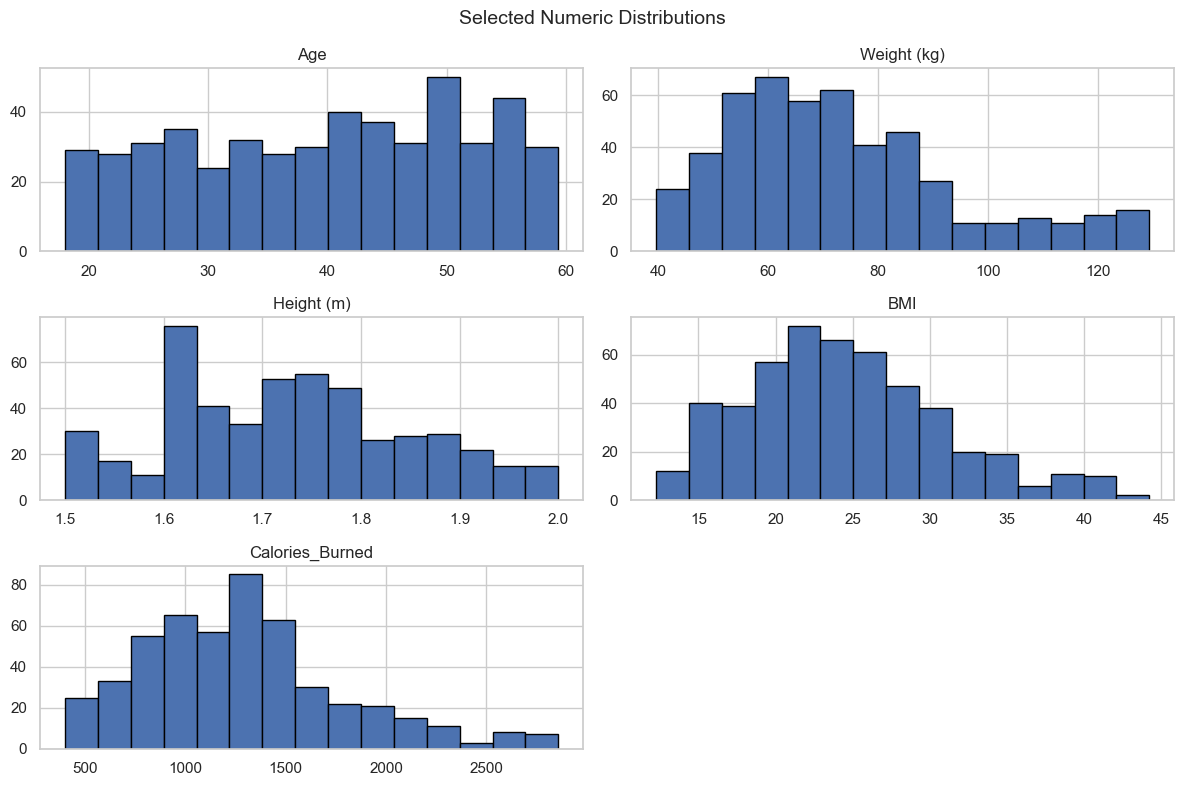

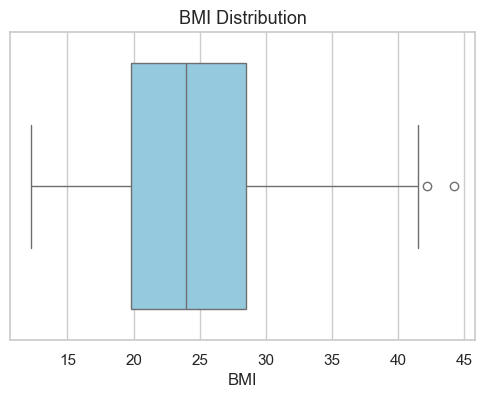

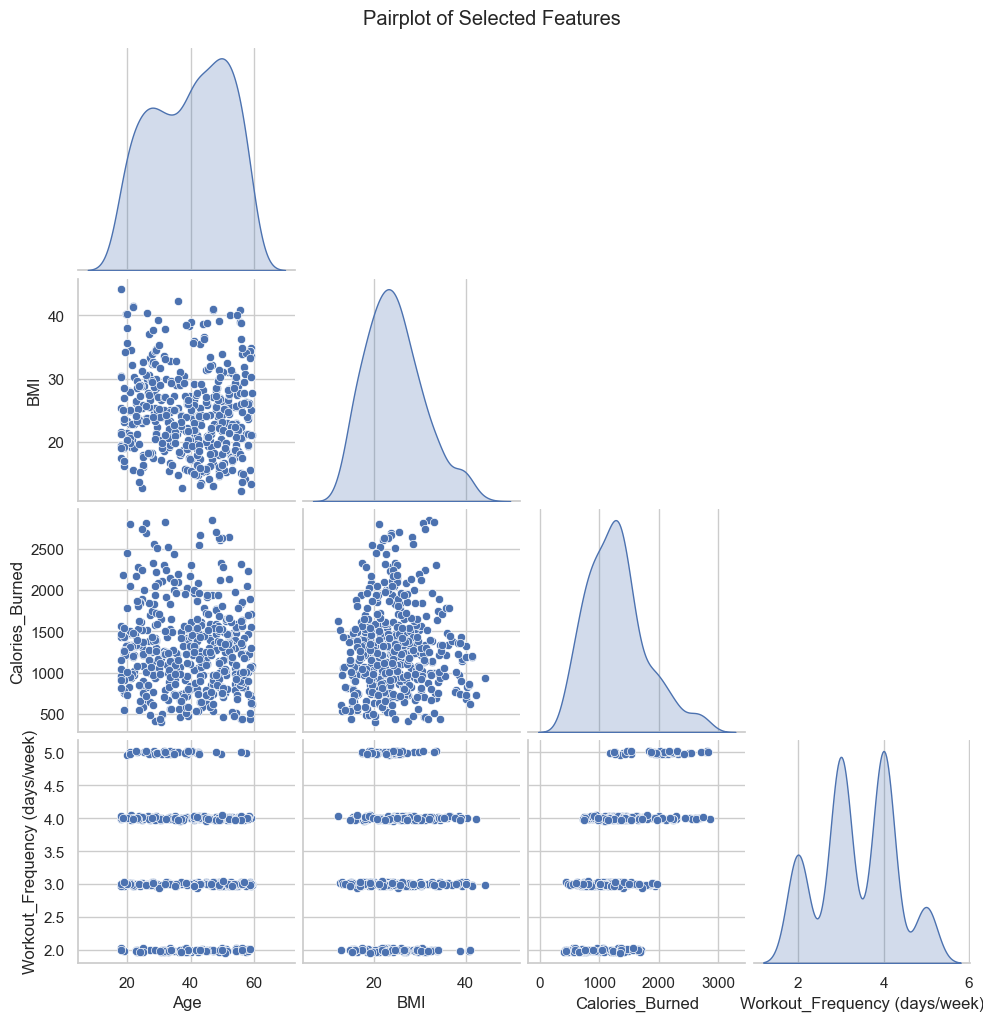

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15616\1591273526.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=sample_df, palette='pastel')


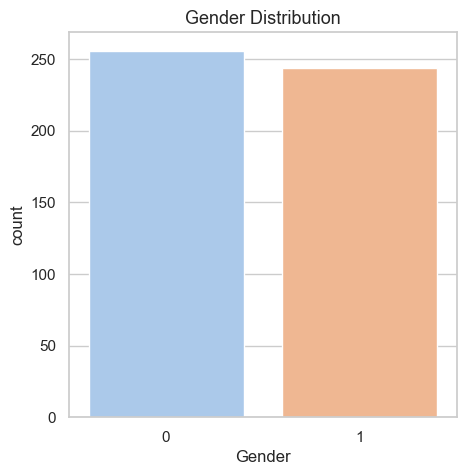

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15616\1591273526.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Workout_Type', y='BMI', data=sample_df, palette='muted')


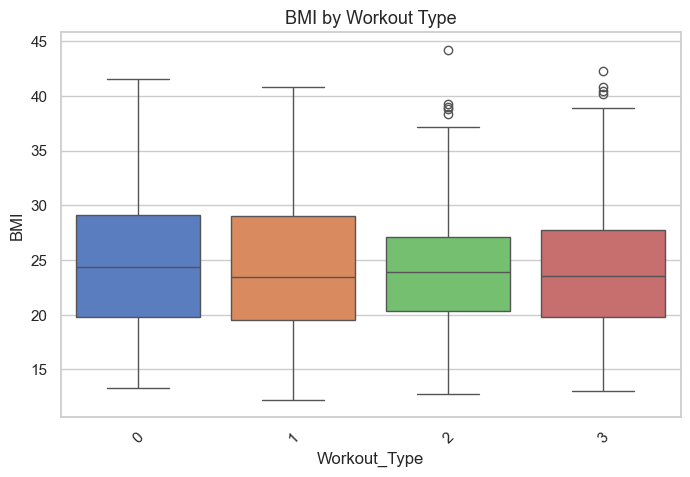

In [26]:
# Visualization of distributions and relationships
sns.set(style='whitegrid')

# Optional: pick a smaller random sample for faster, cleaner plots
sample_df = cleaned_data.sample(n=min(500, len(cleaned_data)), random_state=42)

# 1️⃣ Histograms for selected numeric features
numeric_cols = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Calories_Burned']  # choose only a few
numeric_cols = [c for c in numeric_cols if c in sample_df.columns]  # keep only existing ones

sample_df[numeric_cols].hist(bins=15, figsize=(12,8), edgecolor='black')
plt.suptitle('Selected Numeric Distributions', fontsize=14)
plt.tight_layout()
plt.show()

# 2️⃣ Boxplot example (BMI)
if 'BMI' in sample_df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=sample_df['BMI'], color='skyblue')
    plt.title('BMI Distribution', fontsize=13)
    plt.show()

# 3️⃣ Pairplot (4–5 key variables only)
cols_for_pairs = [c for c in ['Age','BMI','Calories_Burned','Workout_Frequency (days/week)'] if c in sample_df.columns]
if len(cols_for_pairs) > 1:
    sns.pairplot(sample_df[cols_for_pairs], diag_kind='kde', corner=True)
    plt.suptitle('Pairplot of Selected Features', y=1.02)
    plt.show()

# 4️⃣ Categorical counts (Gender)
if 'Gender' in sample_df.columns:
    plt.figure(figsize=(5,5))
    sns.countplot(x='Gender', data=sample_df, palette='pastel')
    plt.title('Gender Distribution', fontsize=13)
    plt.show()

# 5️⃣ Boxplot by category (BMI by Workout Type)
if {'BMI', 'Workout_Type'}.issubset(sample_df.columns):
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Workout_Type', y='BMI', data=sample_df, palette='muted')
    plt.title('BMI by Workout Type', fontsize=13)
    plt.xticks(rotation=45)
    plt.show()



CORRELATION AND REGRESSION 

In [27]:
# Enhanced numeric correlation matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(data, method='pearson', figsize=(14, 12), 
                          annot=True, cmap='coolwarm', title_suffix=""):
    """
    Plot correlation matrix for numeric columns with automatic filtering
    """
    # Select numeric columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    
    # Filter columns
    numeric_cols = [
        c for c in numeric_cols
        if not data[c].isna().all() and data[c].nunique(dropna=True) > 1
    ]
    
    if len(numeric_cols) < 2:
        print(f"Not enough numeric columns with variation to compute correlation. Found {len(numeric_cols)} columns.")
        return None
    
    # Calculate correlation matrix
    correlation_data = data[numeric_cols]
    
    # Optional: handle missing values
    if correlation_data.isna().any().any():
        print("Warning: Data contains missing values. Using pairwise complete observations.")
        correlation_matrix = correlation_data.corr(method=method, min_periods=10)
    else:
        correlation_matrix = correlation_data.corr(method=method)
    
    if correlation_matrix.empty:
        print("Correlation matrix is empty.")
        return None
    
    # Round for cleaner annotations
    corr = correlation_matrix.round(2)
    
    # Mask upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Create plot
    plt.figure(figsize=figsize)
    sns.heatmap(corr, mask=mask, annot=annot, fmt=".2f", cmap=cmap,
                square=True, cbar_kws={"shrink": .8}, vmin=-1, vmax=1,
                center=0, linewidths=0.5, linecolor='white')
    
    # Enhanced title
    title = f"Correlation Matrix of Numeric Features ({method.capitalize()})"
    if title_suffix:
        title += f" - {title_suffix}"
    plt.title(title, fontsize=16, pad=20)
    
    # Adjust layout
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix





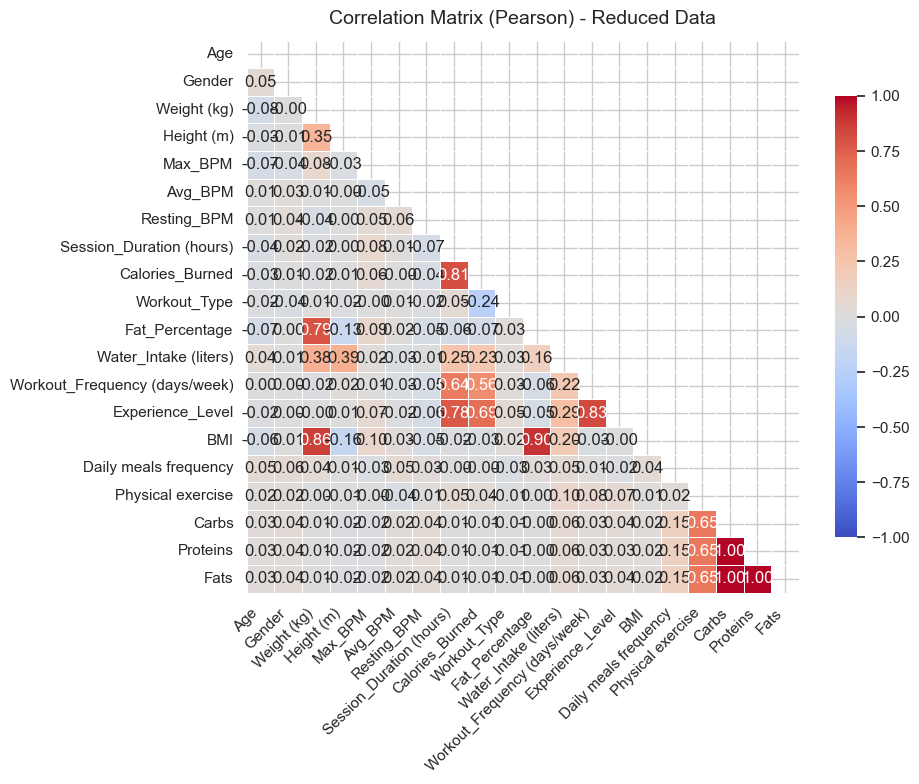


High-correlation pairs (|r| >= 0.8):
Weight (kg) <-> BMI: 0.86
Session_Duration (hours) <-> Calories_Burned: 0.81
Fat_Percentage <-> BMI: 0.90
Workout_Frequency (days/week) <-> Experience_Level: 0.83
Carbs <-> Proteins: 1.00
Carbs <-> Fats: 1.00
Proteins <-> Fats: 1.00

Saved: correlation_matrix.csv and correlation_heatmap.png


<Figure size 640x480 with 0 Axes>

In [32]:
# --- Imports ---
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Helper Functions ---
def get_high_correlation_pairs(corr_matrix, threshold=0.8):
    """Return list of (col1, col2, corr) for abs(corr) >= threshold (upper triangle only)."""
    pairs = []
    cols = corr_matrix.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            val = corr_matrix.iloc[i, j]
            if pd.notna(val) and abs(val) >= threshold:
                pairs.append((cols[i], cols[j], float(val)))
    return pairs


def plot_correlation_matrix(data, method='pearson', figsize=(12, 10),
                            annot=True, cmap='coolwarm', title_suffix=""):
    """Compute and plot correlation heatmap for numeric columns with basic filtering and diagnostics."""
    # select numeric columns
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    # filter out all-NaN or constant columns
    numeric_cols = [c for c in numeric_cols if not data[c].isna().all() and data[c].nunique(dropna=True) > 1]

    if len(numeric_cols) < 2:
        print(f"Not enough numeric columns with variation to compute correlation (found {len(numeric_cols)}).")
        return None

    corr_df = data[numeric_cols].corr(method=method)
    if corr_df.empty:
        print("Correlation dataframe is empty.")
        return None

    corr = corr_df.round(2)
    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=figsize)
    sns.heatmap(corr, mask=mask, annot=annot, fmt=".2f", cmap=cmap,
                square=True, cbar_kws={"shrink": .8}, vmin=-1, vmax=1, linewidths=0.5)
    title = f"Correlation Matrix ({method.capitalize()})"
    if title_suffix:
        title += f" - {title_suffix}"
    plt.title(title, fontsize=14, pad=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return corr_df


# --- Data Reduction + Correlation Analysis ---
# ⚠️ Make sure 'cleaned_data' is already loaded before running this

# 1️⃣ Reduce rows to make plotting faster (e.g., first 2000 rows)
sampled_data = cleaned_data.sample(n=2000, random_state=42)

# 2️⃣ Keep only top 20 numeric columns for clarity
numeric_cols = sampled_data.select_dtypes(include=[np.number]).columns[:20]
reduced_data = sampled_data[numeric_cols]

# 3️⃣ Plot correlation heatmap
corr = plot_correlation_matrix(reduced_data, method='pearson', figsize=(10,8),
                               annot=True, cmap='coolwarm', title_suffix="Reduced Data")

# 4️⃣ Find and display high-correlation pairs
if corr is not None:
    pairs = get_high_correlation_pairs(corr, threshold=0.8)
    if pairs:
        print("\nHigh-correlation pairs (|r| >= 0.8):")
        for a, b, v in pairs:
            print(f"{a} <-> {b}: {v:.2f}")
    else:
        print("\nNo high-correlation pairs found at threshold 0.8.")

    # 5️⃣ Save outputs
    corr.to_csv(r"D:\datascience\DS-project-1\correlation_matrix.csv", index=True)
    plt.savefig(r"D:\datascience\DS-project-1\correlation_heatmap.png", bbox_inches='tight', dpi=150)
    print("\nSaved: correlation_matrix.csv and correlation_heatmap.png")

# ...existing code...